<a href="https://colab.research.google.com/github/Jaimemorillo/ShouldIwatchThisMovie/blob/master/nice_movie_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import pandas as pd
import tensorflow as tf
import time
import numpy as np
import tensorflow_hub as hub

print(tf.__version__)

W0324 11:11:10.514236 139831693535104 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


1.13.1


In [3]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

In [0]:
dataover = pd.read_csv("gdrive/My Drive/TFG/tmdb_spanish_overview.csv",sep='#',lineterminator='\n')
taste = pd.read_csv("gdrive/My Drive/TFG/tmdb_spanish_Jaime2.csv",sep=';', encoding='utf-8')

In [0]:
taste = taste[~taste['id'].str.contains('/')]
taste['id'] = taste['id'].astype(int)

In [0]:
data = taste.merge(dataover[['id','overview']], left_on='id', right_on='id')

In [48]:
data

,id,title,like,vote_average,overview
0,5,Four Rooms,NaN,6.5,"Durante una Nochevieja, en un hotel de Los Áng..."
1,11,La guerra de las galaxias. Episodio IV: Una nu...,1.0,8.1,"La princesa Leia, líder del movimiento rebelde..."
2,12,Buscando a Nemo,1.0,7.6,"Nemo, un pececillo, hijo único muy querido y p..."
3,13,Forrest Gump,1.0,8.2,Forrest Gump es un chico con deficiencias ment...
4,14,American Beauty,NaN,NaN,"Divertida, inquietante y sorprendente incursió..."
5,16,Bailar en la oscuridad,NaN,7.6,La película se desarrolla en Estados Unidos en...
6,18,El quinto elemento,NaN,7.3,Cada 5.000 años se abre una puerta entre las d...
7,19,Metrópolis,NaN,8.0,"En una megalópolis del año 2000, los obreros e..."
8,20,Mi vida sin mí,NaN,7.2,"Ann tiene 23 años, dos hijas, un marido que pa..."
9,22,Piratas del Caribe. La maldición de la Perla N...,1.0,7.5,El aventurero Capitán Jack Sparrow recorre las...


In [49]:
data = data[~pd.isna(data.overview)]
len(data)

4406

In [0]:
""""up = 7.3
under = 5

like = data[data.vote_average >= up]
dislike = data[data.vote_average <= under]
neutral = data.loc[(data['vote_average'] > under) & (data['vote_average'] < up )]

print(len(like))
print(len(dislike))
print(len(neutral))"""

535
442
3429


In [0]:
like.loc[:,'like'] = 1
neutral['like'] = neutral.vote_average.apply(lambda x: 0 if x < 5.9 else 1)
dislike.loc[:,'like'] = 0

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:357: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing

In [0]:
data = like.append(dislike)

In [0]:
data = data.dropna(subset=['like'])

data['like'] = data['like'].astype(int)

In [55]:
len(data)

816

In [0]:
import string

stop_words = pd.read_csv("gdrive/My Drive/TFG/stopwords-es.txt",header=None)
stop_words = stop_words[0].tolist()

def normalize(s):
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
    )
    for a, b in replacements:
        s = s.replace(a, b).replace(a.upper(), b.upper())
    return s

def clean_overview(x):
    x = normalize(x.lower())
    """x = x.replace('.', ' <PERIOD>')
    x = x.replace(',', ' <COMMA>')
    x = x.replace(';', ' <SEMICOLON>')"""
    x = x.translate(str.maketrans('','',string.punctuation))
    x = x.translate(str.maketrans('','','1234567890ªº'))
    return x

def delete_stop_words(x):
    words = x.split(" ")
    words = [word for word in words if word not in stop_words]
    x = str(' '.join(words))
    return x


In [59]:

data['overview']=data['overview'].apply(lambda x: clean_overview(str(x)))
data['overview']=data['overview'].apply(lambda x: delete_stop_words(x))

data


,id,title,like,vote_average,overview
1,11,La guerra de las galaxias. Episodio IV: Una nu...,1,8.1,princesa leia lider movimiento rebelde desea r...
2,12,Buscando a Nemo,1,7.6,nemo pececillo hijo unico querido protegido pa...
3,13,Forrest Gump,1,8.2,forrest gump chico deficiencias mentales profu...
9,22,Piratas del Caribe. La maldición de la Perla N...,1,7.5,aventurero capitan jack sparrow recorre aguas ...
10,24,Kill Bill: Volumen 1,1,7.7,uma thurman asesina boda atacada miembros band...
14,35,Los Simpson: La película,1,6.9,homer salvar mundo catastrofe provocado comien...
17,58,Piratas del Caribe: El cofre del hombre muerto,1,7.0,will turner elizabeth swann casar hechos prisi...
19,62,2001: Una odisea del espacio,1,7.9,historia humanidad diversos estadios futuro na...
20,65,8 millas,1,NaN,detroit promesa potencia industrial transform...
24,70,Million Dollar Baby,1,7.7,frankie dunn entrenado representado mejores pu...


In [0]:
from sklearn.model_selection import train_test_split

overviews = data['overview'].values
y = data['like'].values

overviews_train, overviews_test, y_train, y_test = train_test_split(overviews, y, test_size=0.1, random_state=777, stratify=y)

In [0]:
columns_train = {'Overview': overviews_train, 'Like': y_train}
train = pd.DataFrame(data=columns_train)
train.to_csv('train' + '.csv', sep=';', encoding='utf-8', index=False)

columns_test = {'Comment': overviews_test, 'Like': y_test}
test = pd.DataFrame(data=columns_test)
test.to_csv('test' + '.csv', sep=';', encoding='utf-8', index=False)

In [0]:
# Embedding
num_words = 10000
maxlen = 70
embedding_size = 300

# Convolution
kernel_size = 3
filters = 250
pool_size = 2

hidden_dims = 250


# LSTM
lstm_output_size = 70

# Training
#lr=0.000005
lr=0.000003

In [65]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words) 
tokenizer.fit_on_texts(overviews_train)

X_train = tokenizer.texts_to_sequences(overviews_train) 
X_test = tokenizer.texts_to_sequences(overviews_test)

vocab_size = len(tokenizer.word_index) + 1 # Adding 1 because of reserved 0 index

print(overviews_train[2]) 
print(X_train[2]) 
print(vocab_size)

daniel larusso llega angeles procedente costa unidos dispuesto amigos convierte blanco ataques cobras hostil grupo estudiantes karate comienza salir ali antigua novia cabecilla grupo situacion remedio pedirle ayuda miyagi maestro artes marciales enseñe karate tutela miyagi daniel desarrolla aptitudes fisicas seguridad necesita superar obstaculos
[1872, 4530, 105, 317, 1013, 477, 61, 676, 12, 106, 248, 1335, 4531, 821, 5, 281, 2703, 46, 318, 2704, 362, 53, 2705, 5, 140, 478, 1873, 16, 2706, 479, 1874, 1875, 1876, 2703, 4532, 2706, 1872, 1336, 4533, 4534, 153, 282, 567, 1877]
10652


In [66]:
from collections import OrderedDict

dictWords = dict(tokenizer.word_counts)

print(len(dictWords) + 1)

for k,v in list(dictWords.items()):
    if v < 2 :
        del dictWords[k]
        
print(len(dictWords) + 1) 
# Para establecer el tamaño de maxlen

len(max(X_train, key=len))

10652
4509


81

In [68]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

X_train[1]

array([4518, 2699, 4519, 4520, 2700, 2701, 4521,   34, 2699, 4522,  673,
          6, 4523,  475,   23,   93, 1867, 1012,  674,  139,  117, 4524,
       1868,  476, 4525, 1333,  475, 1869,  316, 1334,  820, 4526,   24,
       1870, 2702, 4527,  675,  475, 4528, 4529, 1871,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0], dtype=int32)

In [69]:
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping

def precision(y_true, y_pred):
    """Precision metric.
    Only computes a batch-wise average of precision.
    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    """Recall metric.
    Only computes a batch-wise average of recall.
    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[0]
    K.get_session().run(tf.local_variables_initializer())
    return auc

#Optimizer

from tensorflow.keras import optimizers

adam = optimizers.Adam(lr)


es = EarlyStopping(monitor='val_loss',
                   min_delta=0,
                   patience=20,
                   verbose=0, mode='auto')

Instructions for updating:
Colocations handled automatically by placer.


W0324 12:04:55.037609 139831693535104 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/resource_variable_ops.py:435: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


In [70]:
from sklearn.utils import class_weight


class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

class_weights

array([0.96578947, 1.03672316])

In [0]:
# Model 1

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D, GlobalMaxPool1D

model = Sequential()

model.add(Embedding(vocab_size,embedding_size, input_length=maxlen))
model.add(GlobalMaxPool1D())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(500, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=adam,
              loss='binary_crossentropy',
              metrics=['acc',precision,recall])

model.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 70, 2048)          22896640  
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              2049000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               50100     
___________________________

In [71]:
# Model 2

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D

model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(vocab_size,
                    embedding_size,
                    input_length=maxlen))
model.add(Dropout(0.2))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
#model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy',precision])

model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


W0324 12:05:03.592304 139831693535104 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/layers/core.py:143: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 70, 300)           3195600   
_________________________________________________________________
dropout (Dropout)            (None, 70, 300)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 68, 250)           225250    
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               62750     
_________________________________________________________________
activation (Activation)      (None, 250)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 251       
__________

In [72]:
history = model.fit(X_train, y_train,
                    epochs=1000,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=32, callbacks=[es], class_weight = class_weights)

Train on 734 samples, validate on 82 samples
Instructions for updating:
Use tf.cast instead.


W0324 12:05:07.286806 139831693535104 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


W0324 12:05:07.480005 139831693535104 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:102: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


Epoch 1/1000
734/734 [==============================] - 3s 5ms/sample - loss: 0.6932 - acc: 0.5177 - precision: 0.0435 - val_loss: 0.6935 - val_acc: 0.4878 - val_precision: 0.0000e+00
Epoch 2/1000
734/734 [==============================] - 0s 437us/sample - loss: 0.6930 - acc: 0.5191 - precision: 0.0435 - val_loss: 0.6935 - val_acc: 0.5000 - val_precision: 0.0000e+00
Epoch 3/1000
734/734 [==============================] - 0s 420us/sample - loss: 0.6928 - acc: 0.5123 - precision: 0.0000e+00 - val_loss: 0.6935 - val_acc: 0.4878 - val_precision: 0.0000e+00
Epoch 4/1000
734/734 [==============================] - 0s 406us/sample - loss: 0.6927 - acc: 0.5136 - precision: 0.0000e+00 - val_loss: 0.6935 - val_acc: 0.5000 - val_precision: 0.0000e+00
Epoch 5/1000
734/734 [==============================] - 0s 394us/sample - loss: 0.6924 - acc: 0.5163 - precision: 0.0000e+00 - val_loss: 0.6934 - val_acc: 0.5000 - val_precision: 0.0000e+00
Epoch 6/1000
734/734 [==============================] - 0s 3

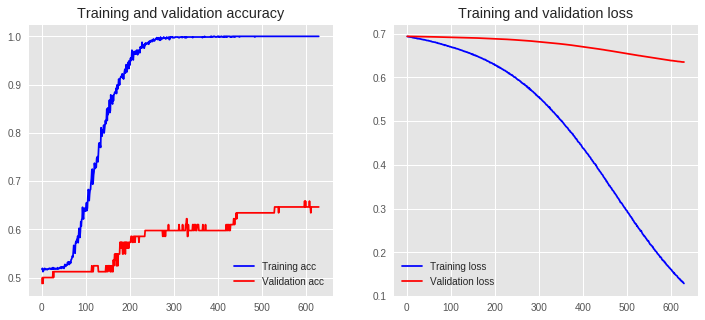

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
plot_history(history)

In [74]:
y_pred = model.predict_classes(X_test)
y_score = model.predict(X_test)
#y_pred= model.predict_classes(X_neutral)
#y_test = y_netural

"""for idx,p in enumerate(y_score):
    if p >= 0.5:
        y_pred[idx] = 1
    else:
        y_pred[idx] = 0"""

'for idx,p in enumerate(y_score):\n    if p >= 0.5:\n        y_pred[idx] = 1\n    else:\n        y_pred[idx] = 0'

In [75]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

print("Confusion Matrix: \n" + str(confusion_matrix(y_test, y_pred)))
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))
print("Kappa: {:.4f}".format(cohen_kappa_score(y_test, y_pred)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred,pos_label=1)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred,pos_label=1)))
print("F1: {:.4f}".format(f1_score(y_test, y_pred,pos_label=1)))
print("Auc: {:.4f}".format(roc_auc_score(y_test, y_pred)))

Confusion Matrix: 
[[36  6]
 [23 17]]
Accuracy: 0.6463
Kappa: 0.2850
Precision: 0.7391
Recall: 0.4250
F1: 0.5397
Auc: 0.6411


In [0]:
model.save('nice_movie' + '_model.h5')  

In [76]:
!pip install tmdbsimple

import tmdbsimple as tmdb

tmdb.API_KEY = '38dd5c6c01713ef99903275d51e2fd68'

In [0]:
def get_likeness(film):
  
  search = tmdb.Search()
  response = search.movie(query=film,language='es-ES')
  
  print(response)
  

  if len(response['results']) >= 1:
    over = response['results'][0]['overview']

    over = clean_overview(str(over))
    over = delete_stop_words(over)

    X_over = tokenizer.texts_to_sequences(np.array([over]))
    X_over = pad_sequences(X_over, padding='post', maxlen=maxlen)

    y_over = model.predict_classes(X_over)
    y_score = model.predict(X_over)

    return (str(y_over[0][0]) , str(y_score[0][0]) )
  
  else:
    
    return 'No existe la peli'
  

In [83]:
get_likeness("Dunkerque")

{'page': 1, 'total_results': 4, 'total_pages': 1, 'results': [{'vote_count': 8743, 'id': 374720, 'video': False, 'vote_average': 7.4, 'title': 'Dunkerque', 'popularity': 29.85, 'poster_path': '/iWzrUYxUfnpmLbm0rwyGKuFwpTO.jpg', 'original_language': 'en', 'original_title': 'Dunkirk', 'genre_ids': [10752, 28, 18], 'backdrop_path': '/2bG3HXcUze0GyGAKnJSDF6gllzk.jpg', 'adult': False, 'overview': 'II Guerra Mundial. Cientos de miles de británicos y tropas aliadas están rodeados por las fuerzas enemigas. Atrapados en la playa con el mar a sus espaldas se enfrentan a una situación imposible mientras el enemigo se acerca. La película relata la Operación Dinamo, también conocida como el milagro de Dunkerque. Se trató de una operación de evacuación de las tropas aliadas en territorio francés, que tuvo lugar a finales de mayo de 1940. La operación permitió el rescate de más de 200.000 soldados británicos y más de 100.000 franceses y belgas.', 'release_date': '2017-07-19'}, {'vote_count': 27, 'id'

('1', '0.50118536')

In [0]:
word_embds = model.layers[1].get_weights()[0]
word_list = []
for word, i in tokenizer.word_index.items():
    word_list.append(word)

In [0]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2).fit_transform(word_embds)
number_of_words = 1000
trace = go.Scatter(
    x = X_embedded[0:number_of_words,0], 
    y = X_embedded[0:number_of_words, 1],
    mode = 'markers',
    text= word_list[0:number_of_words]
)
layout = dict(title= 't-SNE 1 vs t-SNE 2 for sirst 1000 words ',
              yaxis = dict(title='t-SNE 2'),
              xaxis = dict(title='t-SNE 1'),
              hovermode= 'closest')
fig = dict(data = [trace], layout= layout)
py.iplot(fig)

In [0]:
import xgboost as xgb

#model = xgb.XGBClassifier(max_depth=10,n_estimators=150,silent=False,objective='binary:logistic')
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [0]:
y_pred = model.predict(X_test)
y_score = model.predict_proba(X_test!

In [0]:
!pip install finetune

In [0]:
from finetune import Classifier

model = Classifier()               # Load base model
model.fit(X_train, y_train)          # Finetune base model on custom data
y_pred = model.predict(X_test)

INFO:finetune:Saving tensorboard output to /tmp/Finetunef9d3zaxi


AttributeError: ignored